In [1]:
%matplotlib inline

In [102]:
import h5py
import sklearn
import numpy as np
import sklearn.manifold
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy.linalg
from matplotlib import offsetbox

In [3]:
f = h5py.File("analysis/final_clust_states.h5","r")

In [20]:
!ls analysis/

clust_state_row_labels.txt  final_clust_states.h5


In [27]:
labels = []
for l in open("analysis/clust_state_row_labels.txt"):
    labels.append(l.strip().split("\t"))
    labels[-1][0] = labels[-1][0].split(",")
    labels[-1][1] = labels[-1][1].split(",")

In [32]:
labels[13]

[['park',
  'it',
  'Disneyland',
  'Disneyland',
  'home',
  'Disneyland',
  'Disney',
  'Disney',
  'park',
  'it',
  'Disney',
  'park',
  'Disney',
  'its',
  'Disney',
  'park',
  'Disney',
  'park'],
 ['NOMINAL',
  'PRONOMINAL',
  'PROPER',
  'PROPER',
  'NOMINAL',
  'PROPER',
  'PROPER',
  'PROPER',
  'NOMINAL',
  'PRONOMINAL',
  'PROPER',
  'NOMINAL',
  'PROPER',
  'PRONOMINAL',
  'PROPER',
  'NOMINAL',
  'PROPER',
  'NOMINAL']]

In [4]:
hidden = f["H"]

In [42]:
for i in range(hidden.shape[0]):
    print(i, np.linalg.norm(hidden[i]))

0 0.817873
1 0.845734
2 0.659487
3 0.619255
4 1.41886
5 0.867743
6 0.817572
7 0.597214
8 0.823954
9 0.641607
10 0.50347
11 0.589036
12 1.65708
13 2.126
14 0.587235
15 0.69247
16 0.77976
17 0.773454
18 0.727528
19 0.886542
20 0.676089
21 0.578487
22 0.465144
23 0.655109
24 1.04853
25 0.681311
26 0.884804
27 0.527199
28 1.27957
29 0.770106
30 0.596377
31 0.977573
32 0.738617
33 0.676873
34 0.846227
35 0.69331
36 0.77558
37 0.970942
38 0.735069
39 0.69787
40 0.558287
41 0.774043
42 0.89943
43 0.851723
44 0.741248
45 0.649145
46 0.770146
47 0.928344
48 0.510502
49 0.630658
50 0.592204
51 0.749639
52 0.478454
53 0.535174
54 0.876745
55 1.007
56 0.802772
57 0.57912
58 0.654841
59 0.851187
60 0.620705
61 0.929935
62 0.445859
63 1.49554
64 1.05511
65 0.734595
66 0.563959
67 0.643692
68 0.565637
69 0.827357
70 0.725475
71 0.699751
72 0.630533
73 0.941744
74 0.630941
75 0.747427
76 0.562154
77 0.745872
78 0.859395
79 0.662959
80 0.660356
81 0.850518
82 0.683561
83 0.59317
84 0.772025
85 0.687862

In [174]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(6,6))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        lstype = 3
        letter = ":".join(labels[rows[i]][0])

        if len(labels[rows[i]][1]) == 1: continue
        if all([l == "PROPER" for l in labels[rows[i]][1]]):
            lstype = 1

        if all([l == "PRONOMINAL" for l in labels[rows[i] ][1]]):
            lstype = 2

        if all([l == "NOMINAL" for l in labels[rows[i] ][1]]):
            lstype = 3

        if any([l == "PRONOMINAL" for l in labels[rows[i] ][1]]):
            lstype = 2

        elif any([l == "NOMINAL" for l in labels[rows[i]][1]]):
            lstype = 3


        plt.scatter(X[i, 0], X[i, 1], 
            #str("x"),
                 color=plt.cm.Set1((lstype -1) / 3))
                 #fontdict={'weight': 'bold', 'size': 9})
        i += 1    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0

        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            letter = ":".join(labels[rows[i]][0])
            if len(letter) > 20:
                letter = letter[:20] + "..."
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-2 :
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.TextArea(letter),
#                 offsox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)

    #plt.tight_layout(pad=0.4, w_pad=5, h_pad=5.0)
    
    #plt.legend(["None", "PROPER", "PRONOMINAL", "NOMINAL"])
    plt.xticks([]), plt.yticks([])
    plt.axis('off')

    if title is not None:
        plt.title(title)
    plt.subplots_adjust(left=-0.2, right=1.2, top=1.2, bottom=-0.2)

In [56]:
hidden = np.array(f["H"])

In [60]:

rows = [i for i in range(hidden.shape[0])
        if len(labels[i][1]) > 1]

non_singleton = np.array(hidden[rows])

t = sklearn.manifold.TSNE()
X_sne = t.fit_transform(non_singleton)

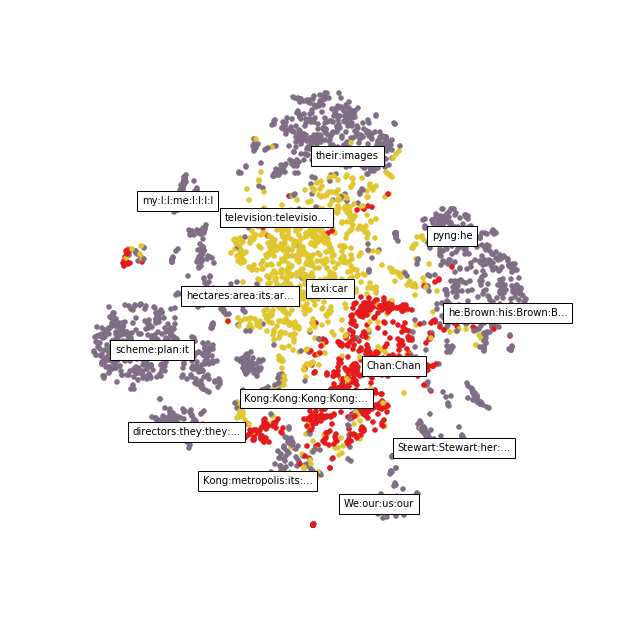

In [175]:

plot_embedding(X_sne)


#plt.savefig("figure.png", dpi=100)

In [97]:
!mv tmp.png temp/output/

In [ ]:
t0 = 0

In [ ]:
X_iso = sklearn.manifold.Isomap(30, n_components=2).fit_transform(hidden)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


In [43]:
print("Computing PCA projection")

X_pca = sklearn.decomposition.TruncatedSVD(n_components=2).fit_transform(hidden)

Computing PCA projection


In [26]:
hidden[10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [45]:
X_pca[500]

array([ 0.62387937, -0.12132065])

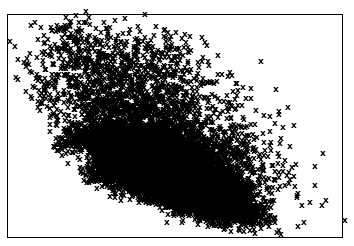

In [47]:
plot_embedding(X_pca)